## 1. Capture the semantics of latest 20 tweets of any friend / user and perform a cluster analysis around it

In [25]:
import tweepy
from tweepy import Stream
from tweepy import StreamListener
import json
import pandas as pd
import re
from textblob import TextBlob

In [26]:
consumer_key = "Y6VihTInqcxj6ee8ZFPHCKDfJ"
consumer_secret = "OcN1l4pAOUiHK0mhWKNnzFvLf41bGKxq83rX0R6uStbCMNCANg"
access_token = "1304687571033714689-l4j2KRSAuqD3YX2bMMx4JBWqXEB4VE"
access_token_secret = "r9RNXe4PHJu70PjrTloXG6QZVgn1T526tHesNcUWXnR5w"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [27]:
api=tweepy.API(auth)

In [28]:
user=api.get_user('@Google')
print(user.screen_name)

Google


In [29]:
username = 'Google'
count = 20
tweet=[]
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.text] for tweet in tweets]


except BaseException as e:
      print('failed on_status,',str(e))
    

In [30]:

final_list = []
for sub_list in tweets_list:
    final_list.append(sub_list[0])
    
final_list

['@cptnearlysquirt Hi Earl. Are you getting a specific error message when you try signing into your Google account? W… https://t.co/nmxaWX4D6O',
 "@KiranKu28433234 Hmm. Let's see what we can do to help. Please follow us and let us know when you have so we can sh… https://t.co/eJEw4ei2Q7",
 '@KURT1SC0NN3R Hi there. Just to confirm, are you still able to sign into your Google account? Let us know.',
 "@AbuIbrahim2030 Hmm. We'd like to hear more before moving to DM. Without revealing your email address, could you gi… https://t.co/Jt59NtxwGM",
 '@MohdAfzal250195 Hi Afzal. Have you already tried recovering your account by completing the steps here:… https://t.co/6XlPHMqqx9',
 "@FarmanA96334403 Hi Farman. Let's see what we can do to help. Please follow us and let us know when you have so we… https://t.co/z3Lr1iRdOg",
 '“The science is clear: The world must act now.” CEO @SundarPichai details how we’re working toward a carbon-free fu… https://t.co/8sZWr7eyGV',
 "@KeepitDope__Dee You're welcom

In [31]:
def clean_tweet(data):
    results=[]
    for i in data:
        result=re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','',i) 
        results.append(result)
    return results

clean=clean_tweet(final_list)

In [32]:
clean

[' Hi Earl Are you getting a specific error message when you try signing into your Google account W ',
 ' Hmm Lets see what we can do to help Please follow us and let us know when you have so we can sh ',
 ' Hi there Just to confirm are you still able to sign into your Google account Let us know',
 ' Hmm Wed like to hear more before moving to DM Without revealing your email address could you gi ',
 ' Hi Afzal Have you already tried recovering your account by completing the steps here ',
 ' Hi Farman Lets see what we can do to help Please follow us and let us know when you have so we ',
 'The science is clear The world must act now CEO  details how were working toward a carbonfree fu ',
 'Dee Youre welcome Could you confirm if youre able to sign into your account now',
 ' Hi Manjeet Lets see what we can do to help Look out for a DM with next steps',
 ' Hi Abdulla Lets see what we can do to help Look out for a DM with next steps',
 ' Youre welcome Feel free to reach out if you have any o

In [33]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tweet=clean
tfidf=TfidfVectorizer(stop_words='english')

matrix=tfidf.fit_transform(tweet)

In [35]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(matrix)
labels=kmeans.labels_

In [36]:
for i in range(len(labels)):
    print(str(tweet[i])+" belongs to cluster "+ str(labels[i]))

 Hi Earl Are you getting a specific error message when you try signing into your Google account W  belongs to cluster 0
 Hmm Lets see what we can do to help Please follow us and let us know when you have so we can sh  belongs to cluster 1
 Hi there Just to confirm are you still able to sign into your Google account Let us know belongs to cluster 2
 Hmm Wed like to hear more before moving to DM Without revealing your email address could you gi  belongs to cluster 3
 Hi Afzal Have you already tried recovering your account by completing the steps here  belongs to cluster 0
 Hi Farman Lets see what we can do to help Please follow us and let us know when you have so we  belongs to cluster 1
The science is clear The world must act now CEO  details how were working toward a carbonfree fu  belongs to cluster 4
Dee Youre welcome Could you confirm if youre able to sign into your account now belongs to cluster 2
 Hi Manjeet Lets see what we can do to help Look out for a DM with next steps belongs

## 2. Classify any 5 headlines from any news agency of your choice (NDTV/ Indian Express) taken from twitter / any website .


In [37]:
username = 'NDTV'
count = 5
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list2 = [[tweet.text] for tweet in tweets]
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df2 = pd.DataFrame(tweets_list)

except BaseException as e:
      print('failed on_status,',str(e))

In [39]:
tweets_df2

,0
0,@cptnearlysquirt Hi Earl. Are you getting a sp...
1,@KiranKu28433234 Hmm. Let's see what we can do...
2,"@KURT1SC0NN3R Hi there. Just to confirm, are y..."
3,@AbuIbrahim2030 Hmm. We'd like to hear more be...
4,@MohdAfzal250195 Hi Afzal. Have you already tr...
5,@FarmanA96334403 Hi Farman. Let's see what we ...
6,“The science is clear: The world must act now....
7,@KeepitDope__Dee You're welcome. Could you con...
8,@Manjeet40741833 Hi Manjeet. Let's see what we...
9,@Abdulla55575303 Hi Abdulla. Let's see what we...


In [40]:
final_list2 = []
for sub_list in tweets_list2:
    final_list2.append(sub_list[0])
    
final_list2

['Government\'s 3 "Black" Ordinances Deadly Attack On Farmers\' Rights: Rahul Gandhi https://t.co/YC9DxpARTL https://t.co/8uGoX2ubDb',
 'Kangana Ranaut Should Shift If She Thinks Mumbai Is PoK: Shiv Sena Minister https://t.co/mW19fBAqgQ https://t.co/i6RCyMwN8q',
 "Thai Woman Arrested For Friend's Murder In Surat, CCTV Helped Cops: Police https://t.co/cqBEpSCEIv https://t.co/n0MCWKHCrp",
 'Custody Of Kannada Actor Ragini Dwivedi, 7 Others Extended In Drugs Case https://t.co/LCfR61xQsx https://t.co/gpIxBqF5EI',
 'RT @Sports_NDTV: With the #IndianPremierLeague (IPL) set to begin on September 19, #KingsXIPunjab fielding coach #JontyRhodes relived his l…']

In [41]:
def clean_tweet(data):
    results=[]
    for i in data:
        result=re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)','',i) 
        results.append(result)
    return results

clean2=clean_tweet(final_list2)

In [42]:
clean2[0]

'Governments 3 Black Ordinances Deadly Attack On Farmers Rights Rahul Gandhi  '

In [43]:
df = pd.DataFrame({'Headline':clean2})

In [44]:
df

,Headline
0,Governments 3 Black Ordinances Deadly Attack O...
1,Kangana Ranaut Should Shift If She Thinks Mumb...
2,Thai Woman Arrested For Friends Murder In Sura...
3,Custody Of Kannada Actor Ragini Dwivedi 7 Othe...
4,NDTV With the IndianPremierLeague IPL set to ...


In [45]:
df['sentiment'] = df['Headline'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [46]:
df

,Headline,sentiment
0,Governments 3 Black Ordinances Deadly Attack O...,-0.183333
1,Kangana Ranaut Should Shift If She Thinks Mumb...,0.000000
2,Thai Woman Arrested For Friends Murder In Sura...,0.000000
3,Custody Of Kannada Actor Ragini Dwivedi 7 Othe...,0.000000
4,NDTV With the IndianPremierLeague IPL set to ...,0.000000


#### Classification based on NaiveBayesClassifier

In [6]:
import pandas as pd
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier


In [7]:

training_set = [("Anushka Sharma on her pregnancy: Nothing is more real and humbling" ,'entertainment'),
                ("Boeing execs defend safety decisions on 737 MAX development", 'business'),
                ("Naomi Osaka wins second US Open title with a comeback against Victoria Azarenka", 'sports'),
                ("Mayawati Requests Centre, States To Waive School Fees Of Children", 'politics'),
                ("AmazonBasics Appliances, Electronics Flagged as Potentially Dangerous: Report", 'Tech'),
               ("Chris Hemsworth: Had more fun on Thor 4’s script than Thor Ragnarok" ,'entertainment'),
                ("Zomato Raises $160 Million From Tiger Global, Temasek Unit", 'business'),
                ("Mohamed Salah hits hat-trick as Liverpool outgun impressive Leeds United", 'sports'),
                ("China, India Agree Yet Again To Ease Tension On Himalayan Border", 'politics'),
                ("Nvidia Said to Near Deal to Buy Chip Designer Arm for More Than $40 Billion", 'Tech')]



In [8]:
sen1 = "Industrial Production Contracts 10.4% In July"

Classifier = NaiveBayesClassifier(training_set)
print(Classifier.classify(sen1))

business


In [9]:
sen2 = "A hat-trick by MohamedSalah helped Liverpool beat LeedsUnited 4-3 and start their EnglishPremierLeague defence in fine style"

Classifier = NaiveBayesClassifier(training_set)
print(Classifier.classify(sen2))

sports


In [10]:
sen3 = "Paul Walker’s daughter Meadow shares emotional post on his birth anniversary"

Classifier = NaiveBayesClassifier(training_set)
print(Classifier.classify(sen3))

entertainment


In [11]:
sen4 = "New Zealand’s Ardern To Open Border To Foreign Workers If Re-Elected"

Classifier = NaiveBayesClassifier(training_set)
print(Classifier.classify(sen4))

politics


In [12]:
sen5 = "Jio Fiber to Restrict Broadband Speed to 1Mbps if Users Cross Data Cap: Report"

Classifier = NaiveBayesClassifier(training_set)
print(Classifier.classify(sen5))

Tech


## 3. Use the following dataset to train the model.
https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification

In [13]:

import csv
import os
from os import path, walk
import pandas as pd

In [14]:
# creating a list containing all folder names of the dataset
folders = ["business","entertainment","politics","sport","tech"]

In [15]:
# Verifying whether the current directory changed to the desier directory or not
print(os.getcwd())

C:\Users\infom\Downloads\NIELIT\Assignment 10\bbc


In [13]:
# generating  a list call paths containg all the detailed paths for accessing the folders of the dataset 
paths = []
for i in folders:
    paths.append(os.getcwd()+'/'+i)

In [14]:
# printing the path just for verification
print(paths)

['C:\\Users\\infom\\Downloads\\NIELIT\\Assignment 10\\bbc/business', 'C:\\Users\\infom\\Downloads\\NIELIT\\Assignment 10\\bbc/entertainment', 'C:\\Users\\infom\\Downloads\\NIELIT\\Assignment 10\\bbc/politics', 'C:\\Users\\infom\\Downloads\\NIELIT\\Assignment 10\\bbc/sport', 'C:\\Users\\infom\\Downloads\\NIELIT\\Assignment 10\\bbc/tech']


In [15]:
# creating two list texts and labels to store the detailed content and
# and the category of the news
texts = []
labels = []

In [16]:
# getting the path of a folders one by one from the list called paths[]
for path in paths:
#     getting filenames one by one from the list of all files under a directory called path
    for filename in os.listdir(path):
#         opening the file in read only mode with encoding latin1
        with open(path+"/"+filename,"r", encoding = "latin") as file:
#             after reading the file contents are stored in a variable called data
            data = file.read()
#             after removing all newline characters and carriage return from the  data,
#             it is being added at the end of the list texts
            data = data.replace("\n"," ").replace('\r','')
            texts.append(data)
            file.close() # file is being closed
#         setting the category of the news as the folder name in which it reside  
        labels.append(os.path.basename(path)) # from the whole path basename only returns the folder name

In [17]:
# creating a pandas dataframe from two lists texts and labels as two columns
df = pd.DataFrame({'texts':texts,'labels':labels})

In [18]:
# Printing the data frame for verification purpose
df

,texts,labels
0,Ad sales boost Time Warner profit Quarterly p...,business
1,Dollar gains on Greenspan speech The dollar h...,business
2,Yukos unit buyer faces loan claim The owners ...,business
3,High fuel prices hit BA's profits British Air...,business
4,Pernod takeover talk lifts Domecq Shares in U...,business
...,...,...
2220,BT program to beat dialler scams BT is introd...,tech
2221,Spam e-mails tempt net shoppers Computer user...,tech
2222,Be careful how you code A new European direct...,tech
2223,US cyber security chief resigns The man makin...,tech


In [19]:
df['labels'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

In [20]:
# lable encoding for lables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["labels"] = encoder.fit_transform(df["labels"])
df

,texts,labels
0,Ad sales boost Time Warner profit Quarterly p...,0
1,Dollar gains on Greenspan speech The dollar h...,0
2,Yukos unit buyer faces loan claim The owners ...,0
3,High fuel prices hit BA's profits British Air...,0
4,Pernod takeover talk lifts Domecq Shares in U...,0
...,...,...
2220,BT program to beat dialler scams BT is introd...,4
2221,Spam e-mails tempt net shoppers Computer user...,4
2222,Be careful how you code A new European direct...,4
2223,US cyber security chief resigns The man makin...,4


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# count vector for text
count_vect = CountVectorizer(analyzer = "word")
count_vec_X = count_vect.fit_transform(df["texts"])

cvtrain_x,cvtest_x,cvtrain_y,cvtest_y = train_test_split(count_vec_X,df["labels"],test_size = 0.2)

cvtrain_x.shape,cvtest_x.shape,cvtrain_y.shape,cvtest_y.shape

((1780, 29421), (445, 29421), (1780,), (445,))

In [22]:
# tfidf vector for text on word level
tfidf_obj = TfidfVectorizer(analyzer = "word", max_features = 5000)
tfidf_vec_X = tfidf_obj.fit_transform(df["texts"])
tfidf_train_x,tfidf_test_x,tfidf_train_y,tfidf_test_y = train_test_split(tfidf_vec_X,df["labels"],test_size = 0.2)

tfidf_train_x.shape,tfidf_test_x.shape,tfidf_train_y.shape,tfidf_test_y.shape

((1780, 5000), (445, 5000), (1780,), (445,))

## 4. Draw a bar graph denoting the positive , negative , neutral news items from any 25 news items in the above link.

In [23]:
from textblob import TextBlob


df['polarity'] = df['texts'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

df.head(25)

,texts,labels,polarity
0,Ad sales boost Time Warner profit Quarterly p...,0,0.135920
1,Dollar gains on Greenspan speech The dollar h...,0,0.083193
2,Yukos unit buyer faces loan claim The owners ...,0,-0.003889
3,High fuel prices hit BA's profits British Air...,0,0.154193
4,Pernod takeover talk lifts Domecq Shares in U...,0,0.025735
5,Japan narrowly escapes recession Japan's econ...,0,-0.049444
6,Jobs growth still slow in the US The US creat...,0,0.037211
7,"India calls for fair trade rules India, which...",0,0.106856
8,Ethiopia's crop production up 24% Ethiopia pr...,0,0.106818
9,Court rejects $280bn tobacco case A US govern...,0,-0.016667


In [28]:
l=[]
for i in range(len(df)):
    
    if df['polarity'][i] ==0:
        l.append(0)
    elif df['polarity'][i]<0:
        l.append(-1)
    else:
        l.append(1)
        
df['polarity']=l

In [29]:
df.head(25)

,texts,labels,polarity
0,Ad sales boost Time Warner profit Quarterly p...,0,1
1,Dollar gains on Greenspan speech The dollar h...,0,1
2,Yukos unit buyer faces loan claim The owners ...,0,-1
3,High fuel prices hit BA's profits British Air...,0,1
4,Pernod takeover talk lifts Domecq Shares in U...,0,1
5,Japan narrowly escapes recession Japan's econ...,0,-1
6,Jobs growth still slow in the US The US creat...,0,1
7,"India calls for fair trade rules India, which...",0,1
8,Ethiopia's crop production up 24% Ethiopia pr...,0,1
9,Court rejects $280bn tobacco case A US govern...,0,-1


In [31]:
values = df['polarity'].value_counts()

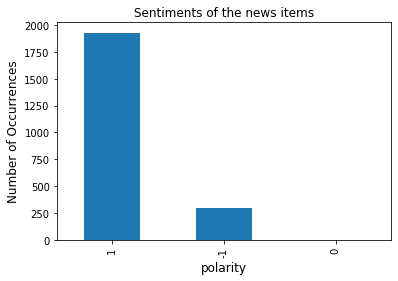

In [32]:
import matplotlib.pyplot as plt


values.plot.bar()
plt.title('Sentiments of the news items')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('polarity', fontsize=12)
plt.show()
